In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\bever\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Read the CSV and Perform Basic Data Cleaning

In [164]:
df = pd.read_csv(os.path.join("..", "data", "exoplanet_data.csv"))
#" Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [165]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df.drop("koi_disposition", axis=1)
# selected_features = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_period','koi_time0bk',
#                         'koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_model_snr',
#                         'koi_tce_plnt_num','koi_steff','koi_slogg','koi_srad','ra','dec','koi_kepmag']]
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
#selected_features = df.drop("koi_disposition", axis=1)
# selected_features = df[['koi_time0bk',
#                         'koi_duration',
#                         'koi_model_snr',
#                         'koi_prad']]
# selected_features = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_period','koi_time0bk',
#                         'koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_model_snr']]
selected_features_names = selected_features.columns
selected_features.head()
selected_features_names = selected_features.columns
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [166]:
selected_features_names

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# Create a Train Test Split

Use `koi_disposition` for the y values

In [167]:
target = df["koi_disposition"]
target_names = ["CANIDATE", "CONFIRMED","FALSE POSITIVE"]
data = selected_features
data_names = selected_features_names

In [168]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [169]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [170]:
X_test.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
4982,1,0,0,0,88.523517,2.337000e-03,-2.337000e-03,189.275600,0.023200,-0.023200,...,-75,4.782,0.060,-0.070,0.462,0.050,-0.070,295.57629,48.897861,15.841
4866,0,0,0,0,102.493119,1.322000e-03,-1.322000e-03,166.009400,0.010500,-0.010500,...,-140,4.583,0.024,-0.117,0.791,0.132,-0.055,297.66437,46.944820,15.142
2934,0,0,1,0,1.181165,3.890000e-06,-3.890000e-06,132.425220,0.002760,-0.002760,...,-154,4.582,0.048,-0.078,0.747,0.098,-0.066,291.34879,51.256119,15.971
5007,0,1,0,0,8.412009,2.360000e-07,-2.360000e-07,139.648520,0.000024,-0.000024,...,-206,4.225,0.185,-0.185,1.314,0.373,-0.305,291.84970,37.738621,13.551
3869,0,1,1,1,1.195515,5.730000e-07,-5.730000e-07,132.303851,0.000410,-0.000410,...,-182,4.271,0.220,-0.180,1.155,0.331,-0.271,297.54337,41.947979,13.998


In [171]:
y_train.head()

6122         CANDIDATE
6370    FALSE POSITIVE
2879    FALSE POSITIVE
107          CONFIRMED
29           CANDIDATE
Name: koi_disposition, dtype: object

In [172]:
y_test.head()

4982    FALSE POSITIVE
4866         CANDIDATE
2934    FALSE POSITIVE
5007    FALSE POSITIVE
3869    FALSE POSITIVE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [173]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824
k: 21, Train/Test Score: 0.839/0.823
k: 23, Train/Test Score: 0.840/0.826
k: 25, Train/Test Score: 0.837/0.824
k: 27, Train/Test Score: 0.836/0.822
k: 29, Train/Test Score: 0.835/0.824
k: 31, Train/Test Score: 0.834/0.820
k: 33, Train/Test Score: 0.835/0.827
k: 35, Train/Test Score: 0.833/0.826
k: 37, Train/Test Score: 0.834/0.822
k: 39, Train/Test Score: 0.833/0.824
k: 41, Train/Test Score: 0.832/0.823
k: 43, Train/Test Score: 0.830/0.823
k: 45, Train/Test Score: 0.828/0.824
k: 47, Train/Test Score: 0.829/0.824
k: 49, Train/Test Score: 0.829/0.825
k: 51, Train/Test Score: 0.828/0.825
k: 53, Train/Test Score: 0.828/0.824
k: 55,

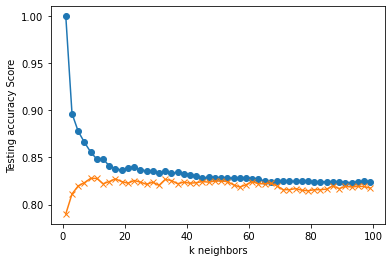

In [175]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [191]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

print('k=15 Test Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.841
k=15 Test Acc: 0.824


In [192]:
knn

KNeighborsClassifier(n_neighbors=15)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [179]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust

param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean','manhattan'],
              'p': [1,2,3,4,5],
             'leaf_size': [10,20,30,40,50]}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [180]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.827, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.805, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.827, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.804, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.799, total=   0.4s
[CV] leaf_si

[CV]  leaf_size=10, metric=euclidean, n_neighbors=3, p=5, weights=distance, score=0.808, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.825, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.811, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.812, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=10

[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.810, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.810, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.813, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.828, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.807, total=   0.5s
[CV] leaf_s

[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=uniform, score=0.807, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=uniform, score=0.809, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.827, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.806, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.807, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.810, total=   0.4s
[CV] leaf_

[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.833, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.816, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.823, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.834, total=   0.5s
[CV] leaf_size=1

[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.819, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.819, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.801, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.814, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.824, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.819, total=   0.4s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.821, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.801, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.832, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.810, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.819, total=   0.5s
[

[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=3, weights=distance, score=0.808, total=   0.7s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=3, weights=distance, score=0.812, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.832, total=   0.7s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.811, total=   0.6s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.831, total=   0.6s
[CV] leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.808, total=   0.7s
[CV]

[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=uniform, score=0.813, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.838, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.810, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.829, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.813, total=   0.

[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.834, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.810, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.805, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.820, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.835, total=   0.4s
[CV] 

[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.814, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.822, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.829, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.812, total=   0.5s


[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=uniform, score=0.833, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=uniform, score=0.810, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=uniform, score=0.818, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.817, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.832, total=   0.5s
[

[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance, score=0.806, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=1, weights=distance, score=0.818, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.832, total=   0.6s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.817, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.836, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.803, total=   0.5s
[CV]

[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=uniform, score=0.822, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.832, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.820, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.838, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.804, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.822, total=   0.

[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.827, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.820, total=   0.5s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.833, total=   0.6s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.818, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.831, total=   0.5s
[CV] 

[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.818, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.809, total=   0.4s
[CV] leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=10, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.816, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.855, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.825, total=   0.4s
[CV]

[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=uniform, score=0.821, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=uniform, score=0.844, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.854, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.826, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.823, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.822, total=   0.3s
[CV] leaf_

[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.858, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.831, total=   0.5s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.820, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.823, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.858, total=   0.4s
[CV] leaf_size=1

[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=4, weights=distance, score=0.829, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=4, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=4, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.862, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.832, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.830, total=   0.4s
[CV] leaf_siz

[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=uniform, score=0.840, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.839, total=   0.3s
[CV] lea

[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.859, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.835, total=   0.5s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.826, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.848, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.860, total=   0.4s
[CV] 

[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.842, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.837, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.850, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.852, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.843, total=   0.4s


[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=uniform, score=0.826, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=uniform, score=0.842, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.863, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.837, total=   0.3s
[

[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=2, weights=distance, score=0.829, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=2, weights=distance, score=0.840, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.849, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.844, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.826, total=   0.4s
[CV]

[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.859, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.838, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.833, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.839, total=   0.

[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.855, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.839, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=21, p=2, weights=distance, score=0.857, total=   0.4s
[CV] 

[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.841, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.830, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.840, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=uniform, score=0.855, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=23, p=2, weights=uniform, score=0.838, total=   0.4s


[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform, score=0.846, total=   0.5s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform, score=0.829, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=uniform, score=0.843, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.860, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.836, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.846, total=   0.4s
[

[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=5, weights=distance, score=0.831, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=25, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=25, p=5, weights=distance, score=0.842, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.858, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.848, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.826, total=   0.4s
[CV]

[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.861, total=   0.5s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.846, total=   0.3s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.829, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.840, total=   0.

[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.856, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.851, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.842, total=   0.4s
[CV] leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=10, metric=manhattan, n_neighbors=29, p=5, weights=distance, score=0.861, total=   0.3s
[CV] 

[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=4, weights=distance, score=0.799, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=4, weights=distance, score=0.807, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=4, weights=distance, score=0.808, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=5, weights=uniform, score=0.827, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=5, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=3, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=3, p=5, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_siz

[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance, score=0.810, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance, score=0.810, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=5, p=4, weights=distance, score=0.813, total=   0.3s
[CV] lea

[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform, score=0.807, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform, score=0.810, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform, score=0.807, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=uniform, score=0.809, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=7, p=4, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size

[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=3, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=3, weights=distance, score=0.823, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform, score=0.833, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform, score=0.816, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform, score=0.807, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=9, p=4, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=

[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance, score=0.801, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=3, weights=distance, score=0.814, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=11, p=4, weights=uniform, score=0.824, total=   0.4

[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform, score=0.815, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform, score=0.821, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform, score=0.801, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=13, p=3, weights=distance, score=0.810, total=   0.3s
[CV

[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance, score=0.808, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=2, weights=distance, score=0.812, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=3, weights=uniform, score=0.832, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=3, weights=uniform, score=0.811, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=15, p=3, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=15, p=3, weights=uniform, score=0.831, total=   0.4s
[C

[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=uniform, score=0.813, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance, score=0.838, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance, score=0.810, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=17, p=2, weights=distance, score=0.806, total=   0.4s

[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=1, weights=distance, score=0.821, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform, score=0.810, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform, score=0.805, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=19, p=2, weights=uniform, score=0.820, total=   0.4s
[CV] l

[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance, score=0.814, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=1, weights=distance, score=0.822, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=21, p=2, weights=uniform, score=0.829, total=   0.5

[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform, score=0.811, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform, score=0.833, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform, score=0.810, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=uniform, score=0.818, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=1, weights=distance, score=0.817, total=   0.3s
[CV

[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=5, weights=distance, score=0.832, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=5, weights=distance, score=0.805, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=23, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=23, p=5, weights=distance, score=0.818, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform, score=0.832, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform, score=0.817, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=1, weights=uniform, score=0.836, total=   0.6s
[C

[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=uniform, score=0.803, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=uniform, score=0.818, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance, score=0.816, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance, score=0.836, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=25, p=5, weights=distance, score=0.806, total=   0.3s

[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=4, weights=distance, score=0.822, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform, score=0.828, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform, score=0.821, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform, score=0.834, total=   0.5s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=27, p=5, weights=uniform, score=0.822, total=   0.4s
[CV] l

[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance, score=0.831, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance, score=0.818, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance, score=0.809, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=4, weights=distance, score=0.816, total=   0.3s
[CV] leaf_size=20, metric=euclidean, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=20, metric=euclidean, n_neighbors=29, p=5, weights=uniform, score=0.827, total=   0.4

[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=uniform, score=0.823, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=uniform, score=0.821, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=uniform, score=0.844, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=distance, score=0.854, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=distance, score=0.826, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=3, p=4, weights=distance, score=0.823, total=   0.3s
[CV] leaf_si

[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=3, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform, score=0.858, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform, score=0.831, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform, score=0.820, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=5, p=4, weights=uniform, score=0.823, total=   0.3s
[CV] leaf_size=20

[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=3, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=4, weights=uniform, score=0.862, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=7, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=7, p=4, weights=uniform, score=0.832, total=   0.3s
[CV] leaf_s

[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=uniform, score=0.840, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=9, p=3, weights=distance, score=0.819, total=   0.3s
[CV] leaf_

[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform, score=0.859, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform, score=0.835, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=uniform, score=0.848, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=11, p=3, weights=distance, score=0.860, total=   0.3s
[CV] 

[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance, score=0.837, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=2, weights=distance, score=0.850, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=3, weights=uniform, score=0.852, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=13, p=3, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=13, p=3, weights=uniform, score=0.843, total=   0.4s


[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=uniform, score=0.842, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=15, p=2, weights=distance, score=0.837, total=   0.3s
[

[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=1, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=1, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform, score=0.849, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform, score=0.844, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform, score=0.841, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=17, p=2, weights=uniform, score=0.826, total=   0.4s
[CV]

[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance, score=0.859, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance, score=0.838, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance, score=0.833, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=19, p=1, weights=distance, score=0.839, total=   0.

[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform, score=0.855, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=uniform, score=0.839, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=1, weights=distance, score=0.857, total=   0.4s
[CV] 

[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=21, p=5, weights=distance, score=0.844, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=1, weights=uniform, score=0.855, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=1, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=1, weights=uniform, score=0.838, total=   0.4s


[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=uniform, score=0.840, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=distance, score=0.855, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=23, p=5, weights=distance, score=0.841, total=   0.3s
[

[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=4, weights=distance, score=0.831, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=4, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform, score=0.856, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform, score=0.846, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=25, p=5, weights=uniform, score=0.829, total=   0.4s
[CV]

[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance, score=0.861, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance, score=0.846, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=27, p=4, weights=distance, score=0.840, total=   0.

[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform, score=0.856, total=   0.5s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform, score=0.851, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=uniform, score=0.842, total=   0.4s
[CV] leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=distance 
[CV]  leaf_size=20, metric=manhattan, n_neighbors=29, p=4, weights=distance, score=0.861, total=   0.3s
[CV] 

[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=3, weights=distance, score=0.799, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=3, weights=distance, score=0.807, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=3, weights=distance, score=0.808, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=4, weights=uniform, score=0.827, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=4, weights=uniform, score=0.803, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=3, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=3, p=4, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_siz

[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=uniform, score=0.812, total=   0.5s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance, score=0.827, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance, score=0.806, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance, score=0.810, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance, score=0.810, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=5, p=3, weights=distance, score=0.813, total=   0.3s
[CV] lea

[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform, score=0.807, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform, score=0.810, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=uniform, score=0.809, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=7, p=3, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size

[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=2, weights=distance, score=0.823, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform, score=0.833, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform, score=0.816, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=9, p=3, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=

[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance, score=0.819, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance, score=0.801, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=2, weights=distance, score=0.814, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=11, p=3, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=11, p=3, weights=uniform, score=0.824, total=   0.4

[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform, score=0.815, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform, score=0.821, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform, score=0.801, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=distance, score=0.832, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=13, p=2, weights=distance, score=0.810, total=   0.3s
[CV

[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance, score=0.808, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=1, weights=distance, score=0.812, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform, score=0.832, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform, score=0.811, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=15, p=2, weights=uniform, score=0.831, total=   0.4s
[C

[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=uniform, score=0.813, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance, score=0.838, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance, score=0.810, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=1, weights=distance, score=0.806, total=   0.3s

[CV]  leaf_size=30, metric=euclidean, n_neighbors=17, p=5, weights=distance, score=0.813, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform, score=0.810, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform, score=0.805, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=1, weights=uniform, score=0.820, total=   0.4s
[CV] l

[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance, score=0.835, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance, score=0.815, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance, score=0.807, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=19, p=5, weights=distance, score=0.821, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=1, weights=uniform, score=0.829, total=   0.4

[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform, score=0.810, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=uniform, score=0.822, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=21, p=5, weights=distance, score=0.814, total=   0.3s
[CV

[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=4, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=4, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=4, weights=distance, score=0.818, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=5, weights=uniform, score=0.830, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=5, weights=uniform, score=0.811, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=23, p=5, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=23, p=5, weights=uniform, score=0.833, total=   0.4s
[C

[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=uniform, score=0.818, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance, score=0.816, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance, score=0.836, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=25, p=4, weights=distance, score=0.806, total=   0.3s

[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=3, weights=distance, score=0.822, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform, score=0.821, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=27, p=4, weights=uniform, score=0.822, total=   0.4s
[CV] l

[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance, score=0.831, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance, score=0.818, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance, score=0.809, total=   0.3s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=3, weights=distance, score=0.816, total=   0.4s
[CV] leaf_size=30, metric=euclidean, n_neighbors=29, p=4, weights=uniform 
[CV]  leaf_size=30, metric=euclidean, n_neighbors=29, p=4, weights=uniform, score=0.827, total=   0.5

[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform, score=0.825, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform, score=0.823, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform, score=0.821, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=uniform, score=0.844, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=distance, score=0.854, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=3, p=3, weights=distance, score=0.826, total=   0.3s
[CV] leaf_size

[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.823, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=2, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform, score=0.858, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform, score=0.831, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=5, p=3, weights=uniform, score=0.820, total=   0.3s
[CV] leaf_size=

[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.830, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=2, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=7, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=7, p=3, weights=uniform, score=0.862, total=   0.4s
[CV] leaf

[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=uniform, score=0.840, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=9, p=2, weights=distance, score=0.832, total=   0.3s
[CV] leaf_si

[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=1, weights=distance, score=0.847, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform, score=0.859, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform, score=0.835, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform, score=0.834, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=11, p=2, weights=uniform, score=0.848, total=   0.3s
[CV] l

[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance, score=0.857, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance, score=0.837, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=1, weights=distance, score=0.850, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=13, p=2, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=13, p=2, weights=uniform, score=0.852, total=   0.4

[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=uniform, score=0.842, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance, score=0.863, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=1, weights=distance, score=0.842, total=   0.3s
[CV

[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=distance, score=0.837, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=15, p=5, weights=distance, score=0.845, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=1, weights=uniform, score=0.849, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=1, weights=uniform, score=0.844, total=   0.5s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=1, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=1, weights=uniform, score=0.841, total=   0.4s
[C

[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=uniform, score=0.826, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance, score=0.855, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance, score=0.843, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance, score=0.836, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=17, p=5, weights=distance, score=0.829, total=   0.3s

[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=4, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform, score=0.855, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform, score=0.839, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform, score=0.830, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=19, p=5, weights=uniform, score=0.838, total=   0.4s
[CV] l

[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance, score=0.857, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance, score=0.840, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=4, weights=distance, score=0.844, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=21, p=5, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=21, p=5, weights=uniform, score=0.855, total=   0.4

[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform, score=0.838, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform, score=0.840, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=distance, score=0.855, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=23, p=4, weights=distance, score=0.839, total=   0.3s
[CV

[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=distance, score=0.846, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=distance, score=0.831, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=3, weights=distance, score=0.842, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=4, weights=uniform, score=0.856, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=4, weights=uniform, score=0.837, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=25, p=4, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=25, p=4, weights=uniform, score=0.846, total=   0.4s
[C

[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=uniform, score=0.841, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance, score=0.861, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance, score=0.846, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=27, p=3, weights=distance, score=0.829, total=   0.3s

[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=2, weights=distance, score=0.843, total=   0.3s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform, score=0.856, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform, score=0.851, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform 
[CV]  leaf_size=30, metric=manhattan, n_neighbors=29, p=3, weights=uniform, score=0.842, total=   0.3s
[CV] l

[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance, score=0.804, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance, score=0.799, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance, score=0.807, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=2, weights=distance, score=0.808, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=3, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=3, p=3, weights=uniform, score=0.827, total=   0.3s
[CV] leaf

[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=uniform, score=0.806, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance, score=0.806, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=5, p=2, weights=distance, score=0.810, total=   0.3s
[CV] leaf_si

[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=1, weights=distance, score=0.807, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform, score=0.810, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform, score=0.807, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=7, p=2, weights=uniform, score=0.809, total=   0.3s
[CV] leaf_size=40

[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.814, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=1, weights=distance, score=0.823, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform, score=0.833, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=9, p=2, weights=uniform, score=0.816, total=   0.3s
[CV] leaf_s

[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.793, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=uniform, score=0.816, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=1, weights=distance, score=0.801, total=   0.3s

[CV]  leaf_size=40, metric=euclidean, n_neighbors=11, p=5, weights=distance, score=0.814, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform, score=0.835, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform, score=0.815, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform, score=0.821, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform, score=0.801, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=1, weights=uniform, score=0.812, total=   0.3s
[CV] l

[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance, score=0.810, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance, score=0.819, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance, score=0.802, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=13, p=5, weights=distance, score=0.814, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=1, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=1, weights=uniform, score=0.832, total=   0.3

[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform, score=0.811, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform, score=0.831, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform, score=0.808, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=uniform, score=0.813, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=distance, score=0.836, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=15, p=5, weights=distance, score=0.814, total=   0.3s
[CV

[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.806, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=4, weights=distance, score=0.813, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=5, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=5, weights=uniform, score=0.811, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=17, p=5, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=17, p=5, weights=uniform, score=0.830, total=   0.3s
[C

[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.805, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=uniform, score=0.820, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance, score=0.815, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=19, p=4, weights=distance, score=0.807, total=   0.3s

[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=3, weights=distance, score=0.822, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform, score=0.829, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform, score=0.810, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=21, p=4, weights=uniform, score=0.822, total=   0.3s
[CV] l

[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.834, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.817, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.805, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=3, weights=distance, score=0.818, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=23, p=4, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=23, p=4, weights=uniform, score=0.830, total=   0.3

[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.817, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.836, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.803, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=uniform, score=0.818, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=25, p=3, weights=distance, score=0.816, total=   0.3s
[CV

[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.838, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.804, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=2, weights=distance, score=0.822, total=   0.2s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=3, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=3, weights=uniform, score=0.821, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=27, p=3, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=27, p=3, weights=uniform, score=0.834, total=   0.4s
[C

[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.803, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=uniform, score=0.818, total=   0.4s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance, score=0.831, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance, score=0.818, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance, score=0.834, total=   0.3s
[CV] leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance 
[CV]  leaf_size=40, metric=euclidean, n_neighbors=29, p=2, weights=distance, score=0.809, total=   0.3s

[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=1, weights=distance, score=0.844, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.855, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.825, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.823, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.821, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=3, p=2, weights=uniform, score=0.844, total=   0.3s
[CV] leaf_size=40

[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.823, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=1, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.858, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=5, p=2, weights=uniform, score=0.831, total=   0.3s
[CV] leaf_s

[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.825, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=uniform, score=0.838, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.829, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=7, p=1, weights=distance, score=0.828, total=   0.3s
[CV] leaf_

[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.865, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.838, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.834, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=uniform, score=0.840, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=1, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=4

[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=9, p=5, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.859, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.835, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=1, weights=uniform, score=0.834, total=   0.3s
[CV] le

[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=uniform, score=0.848, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.860, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.836, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=11, p=5, weights=distance, score=0.826, total=   0.3s

[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=4, weights=distance, score=0.850, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.852, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.843, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.838, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.824, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=13, p=5, weights=uniform, score=0.849, total=   0.3s
[CV] l

[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.837, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.828, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=4, weights=distance, score=0.845, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=15, p=5, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=15, p=5, weights=uniform, score=0.853, total=   0.3

[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.844, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.841, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=uniform, score=0.841, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.855, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=17, p=4, weights=distance, score=0.843, total=   0.3s
[CV

[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.838, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.833, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=3, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.855, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.837, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=19, p=4, weights=uniform, score=0.839, total=   0.3s
[C

[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.828, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=uniform, score=0.839, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.857, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.840, total=   0.2s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=21, p=3, weights=distance, score=0.830, total=   0.2s

[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=2, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.855, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.838, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.840, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=23, p=3, weights=uniform, score=0.838, total=   0.3s
[CV] l

[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.860, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.836, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.846, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.831, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=2, weights=distance, score=0.842, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=25, p=3, weights=uniform, score=0.856, total=   0.6

[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.841, total=   0.5s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.848, total=   0.5s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.826, total=   0.5s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=uniform, score=0.841, total=   0.5s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.861, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=27, p=2, weights=distance, score=0.839, total=   0.3s
[CV

[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.849, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.830, total=   0.3s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=1, weights=distance, score=0.843, total=   0.4s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.856, total=   0.6s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.837, total=   0.6s
[CV] leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform 
[CV]  leaf_size=40, metric=manhattan, n_neighbors=29, p=2, weights=uniform, score=0.851, total=   0.6s
[C

[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.805, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.804, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.799, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=3, p=1, weights=distance, score=0.807, total=   0.3s
[CV] leaf_

[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.825, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.811, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.806, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=1, weights=distance, score=0.827, total=   0.5s
[CV] leaf_size=5

[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.810, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.810, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=5, p=5, weights=distance, score=0.813, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.807, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=1, weights=uniform, score=0.810, total=   0.3s
[CV] leaf_siz

[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=uniform, score=0.809, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.827, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.806, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.807, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.810, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=7, p=5, weights=distance, score=0.807, total=   0.2s
[CV] lea

[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.816, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.807, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.800, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=uniform, score=0.823, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=9, p=5, weights=distance, score=0.814, total=   0.4s
[CV] leaf_size

[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.819, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.801, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=4, weights=distance, score=0.814, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.824, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.819, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=11, p=5, weights=uniform, score=0.819, total=   0.5s
[C

[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.801, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=uniform, score=0.812, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.810, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.819, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=13, p=4, weights=distance, score=0.802, total=   0.5s

[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=3, weights=distance, score=0.812, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.832, total=   0.6s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.811, total=   0.5s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.831, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.808, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=15, p=4, weights=uniform, score=0.813, total=   0.5s
[CV] l

[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.838, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.810, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.829, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.806, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=3, weights=distance, score=0.813, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=17, p=4, weights=uniform, score=0.838, total=   0.3

[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.810, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.837, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.805, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=uniform, score=0.820, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.835, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=19, p=3, weights=distance, score=0.815, total=   0.3s
[CV

[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.805, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=2, weights=distance, score=0.822, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.829, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.812, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=21, p=3, weights=uniform, score=0.838, total=   0.4s
[C

[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=uniform, score=0.810, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=uniform, score=0.818, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.834, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.817, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=23, p=2, weights=distance, score=0.805, total=   0.3s

[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=1, weights=distance, score=0.818, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.832, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.817, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.836, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.803, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=25, p=2, weights=uniform, score=0.818, total=   0.4s
[CV] l

[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.832, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.820, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.838, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.804, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=1, weights=distance, score=0.822, total=   0.2s
[CV] leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=27, p=2, weights=uniform, score=0.828, total=   0.3

[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.820, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.833, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.803, total=   0.4s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=uniform, score=0.818, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.831, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=1, weights=distance, score=0.818, total=   0.3s
[CV

[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.834, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.809, total=   0.3s
[CV] leaf_size=50, metric=euclidean, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=50, metric=euclidean, n_neighbors=29, p=5, weights=distance, score=0.816, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.855, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.825, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=1, weights=uniform, score=0.823, total=   0.4s
[CV] lea

[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=uniform, score=0.844, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.854, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.826, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.823, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.822, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=3, p=5, weights=distance, score=0.844, total=   0.3s
[CV] lea

[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.831, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.828, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.820, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=uniform, score=0.823, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.858, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=5, p=5, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size

[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=4, weights=distance, score=0.828, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=4, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.862, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.832, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.830, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=7, p=5, weights=uniform, score=0.825, total=   0.4s
[CV] leaf_size=

[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.863, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.834, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.832, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.819, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=4, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=9, p=5, weights=uniform, score=0.865, total=   0.5s
[CV] leaf

[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.835, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.834, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.826, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=uniform, score=0.848, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.860, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=11, p=4, weights=distance, score=0.836, total=   0.4s
[CV

[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.837, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.828, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=3, weights=distance, score=0.850, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.852, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.843, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=13, p=4, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=13, p=4, weights=uniform, score=0.838, total=   0.4s
[C

[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=uniform, score=0.842, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.863, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.842, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.837, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=15, p=3, weights=distance, score=0.828, total=   0.3s

[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=2, weights=distance, score=0.840, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.849, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.844, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.841, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.826, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=17, p=3, weights=uniform, score=0.841, total=   0.3s
[CV] l

[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.859, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.839, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.838, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.833, total=   0.3s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=2, weights=distance, score=0.839, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=19, p=3, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=19, p=3, weights=uniform, score=0.855, total=   0.5

[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.841, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.841, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.828, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=uniform, score=0.839, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=distance, score=0.857, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=21, p=2, weights=distance, score=0.840, total=   0.4s
[CV

[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.841, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.830, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=1, weights=distance, score=0.840, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=2, weights=uniform, score=0.855, total=   0.7s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=2, weights=uniform, score=0.838, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=23, p=2, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=23, p=2, weights=uniform, score=0.840, total=   0.6s
[C

[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=uniform, score=0.829, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=uniform, score=0.843, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.860, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.836, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.846, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=1, weights=distance, score=0.831, total=   0.4s

[CV]  leaf_size=50, metric=manhattan, n_neighbors=25, p=5, weights=distance, score=0.842, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.858, total=   0.7s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.841, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.848, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.826, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=1, weights=uniform, score=0.841, total=   0.5s
[CV] l

[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.861, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.839, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.846, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.829, total=   0.4s
[CV] leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=27, p=5, weights=distance, score=0.840, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=1, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=1, weights=uniform, score=0.856, total=   0.7

[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.837, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.851, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.828, total=   0.6s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=uniform, score=0.842, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=distance, score=0.861, total=   0.5s
[CV] leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=distance 
[CV]  leaf_size=50, metric=manhattan, n_neighbors=29, p=5, weights=distance, score=0.840, total=   0.5s
[CV

[Parallel(n_jobs=1)]: Done 7000 out of 7000 | elapsed: 43.0min finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [181]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 29, 'p': 1, 'weights': 'distance'}
0.8445515176212897


In [182]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8409610983981693


In [193]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=7,weights='distance',leaf_size=10,p=2)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_train_scaled, y_train))
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 1.000
k=7 Test Acc: 0.846


In [188]:
# Calculate classification report

predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

      CANIDATE       0.73      0.56      0.63       411
     CONFIRMED       0.69      0.81      0.74       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



In [189]:
# Calculate classification report

predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

      CANIDATE       0.71      0.63      0.67       411
     CONFIRMED       0.72      0.76      0.74       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.85      1748
     macro avg       0.80      0.80      0.80      1748
  weighted avg       0.84      0.85      0.84      1748



# Save the Model

In [190]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_KNN.sav'
joblib.dump(grid, filename)

['model_KNN.sav']